In [266]:
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [267]:
# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
import utils as ut
from pandas_profiling import ProfileReport

In [269]:
DATA_PATH = "../data/union/End"
def load_data_prep(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_final.csv")
    return pd.read_csv(csv_path)

In [270]:
df = load_data_prep()

In [271]:
df.shape

(75, 437)

In [272]:
df1 = df[ut.filtro()]

In [273]:
df1.shape

(75, 74)

In [274]:
fasc = [ 'cfpr_', 'ccbd_', 'ecpl_', 'ifol_', 'sl2l_', 'tral_', 'ufsl_', 'ufsr_' ]
lab = ['radius_of_end_region_1', 'radius_of_end_region_2', 'qa', 'iso']
borrar = []
for i in fasc:
    df1[i+'ip1_dif'] = df1[i+lab[2]]/(df1[i+lab[0]]+df1[i+lab[1]])
    df1[i+'ip2_norm'] = df1[i+lab[3]]/(df1[i+lab[2]])
for i in fasc:
    for j in lab:
        borrar.append(i+j)


In [275]:
df1.drop(borrar, axis=1, inplace=True)

In [276]:
df1.shape

(75, 58)

In [277]:
# Variable a predecir
target = 'label'

# Construcción de la matriz de features
X = df1.drop(['cod', 'label'], axis=1)

# Construcción del vector a predecir
y = df1[target].values

print('Dimensión de la matriz de features: {}'.format(X.shape))
print('Dimensión del vector a predecir: {}'.format(y.shape))
print('Vector a predecir: {}'.format(y))

Dimensión de la matriz de features: (75, 56)
Dimensión del vector a predecir: (75,)
Vector a predecir: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [278]:
## contar si la clase esta balanceada
df1['label'].value_counts()

label
1    50
0    25
Name: count, dtype: int64

In [279]:
df1.loc[df1['label'] == 1].head(2)

,cod,ccbd_diameter,ccbd_mean_length,ccbd_number_of_tracts,ccbd_volume,ecpl_diameter,ecpl_mean_length,ecpl_number_of_tracts,ecpl_volume,ifol_diameter,...,ifol_ip1_dif,ifol_ip2_norm,sl2l_ip1_dif,sl2l_ip2_norm,tral_ip1_dif,tral_ip2_norm,ufsl_ip1_dif,ufsl_ip2_norm,ufsr_ip1_dif,ufsr_ip2_norm
0,sub-10171,27.3579,111.237,36905.0,65389.1,7.004120,111.475000,1048.000000,4295.100000,14.2116,...,0.007929,1.967688,0.006490,2.574465,0.006649,2.486354,0.009425,2.637159,0.008686,3.142950
1,sub-10189,25.3084,115.111,39509.0,57907.5,8.893479,100.580235,2936.541667,6774.582292,14.6817,...,0.003705,2.322339,0.002774,2.668472,0.003548,2.513058,0.003527,4.245304,0.003726,3.239371


In [280]:
df2 = df1.loc[df1['label'] == 0]
df3 = df1.loc[df1['label'] == 1].head(4)
df1_ = pd.concat([df3, df2], ignore_index = True)
df1_.reset_index()

,index,cod,ccbd_diameter,ccbd_mean_length,ccbd_number_of_tracts,ccbd_volume,ecpl_diameter,ecpl_mean_length,ecpl_number_of_tracts,ecpl_volume,...,ifol_ip1_dif,ifol_ip2_norm,sl2l_ip1_dif,sl2l_ip2_norm,tral_ip1_dif,tral_ip2_norm,ufsl_ip1_dif,ufsl_ip2_norm,ufsr_ip1_dif,ufsr_ip2_norm
0,0,sub-10171,27.357900,111.237000,36905.000000,65389.100000,7.004120,111.475000,1048.000000,4295.100000,...,0.007929,1.967688,0.006490,2.574465,0.006649,2.486354,0.009425,2.637159,0.008686,3.142950
1,1,sub-10189,25.308400,115.111000,39509.000000,57907.500000,8.893479,100.580235,2936.541667,6774.582292,...,0.003705,2.322339,0.002774,2.668472,0.003548,2.513058,0.003527,4.245304,0.003726,3.239371
2,2,sub-10206,26.074000,109.945000,39403.000000,58705.600000,8.893479,100.580235,2936.541667,6774.582292,...,0.009230,2.040639,0.004730,2.642847,0.004208,2.376092,0.008046,2.881791,0.006489,2.312317
3,3,sub-10217,30.964700,109.997000,48988.000000,82833.000000,10.907700,95.805300,4655.000000,8952.530000,...,0.007957,2.028316,0.007480,2.615611,0.008466,2.580978,0.006749,3.922734,0.009124,3.273747
4,4,sub-50004,25.403800,114.574000,35879.000000,58073.000000,5.899340,95.191800,1203.000000,2601.930000,...,0.003360,2.094722,0.002178,2.571501,0.004570,2.543132,0.003964,3.382872,0.003659,3.570838
5,5,sub-50005,28.939900,124.653000,49343.000000,81994.700000,8.932960,105.470000,2388.000000,6610.110000,...,0.006625,2.086777,0.005366,2.746744,0.008327,2.672617,0.011621,5.505923,0.010482,5.036197
6,6,sub-50006,23.949400,122.760000,27313.000000,55301.600000,2.347730,74.876500,17.000000,324.140000,...,0.009921,2.065538,0.008864,2.979208,0.026493,2.928306,0.011098,3.058008,0.010129,3.169187
7,7,sub-50007,23.014400,122.248000,26048.000000,50854.700000,8.893479,100.580235,2936.541667,6774.582292,...,0.003771,2.056250,0.002575,2.587897,0.003200,2.563190,0.004845,3.214906,0.004837,3.333044
8,8,sub-50008,29.505800,124.546000,39460.000000,85159.700000,3.974950,82.464600,225.000000,1023.340000,...,0.006030,2.200239,0.004702,2.804641,0.006012,2.741597,0.005585,3.375330,0.005567,3.939550
9,9,sub-50010,24.599000,131.023000,42514.000000,62269.200000,8.893479,100.580235,2936.541667,6774.582292,...,0.004798,1.928807,0.003427,2.552430,0.004242,2.562968,0.004666,3.721833,0.005182,3.294660


In [281]:
# Solo por esta vez para a fijar la semilla de numeros aleatorios
# para que se separe siempre igual cada vez que corramos esta notebook 
random_seed = 123475
y = df1_.loc[:, df1_.columns == 'label']
X = df1_.loc[:, df1_.columns != 'label']
X = X.loc[:, X.columns != 'cod']
# Creacion de las matrices de entrenamiento y testeo. Aca fijamos la semilla para que siempre separe igual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = random_seed)

print('Dimensión de la matriz de features para entrenamiento: {}'.format(X_train.shape))
print('Dimensión de la matriz de features para testeo: {}'.format(X_test.shape))

Dimensión de la matriz de features para entrenamiento: (23, 56)
Dimensión de la matriz de features para testeo: (6, 56)


In [282]:
y_test

,label
0,1
13,0
15,0
7,0
3,1
25,0


In [283]:

std_scale = StandardScaler() # Creamos el estandarizador para usarlo posteriormente

# Ajustamos el estandarizador
std_scale.fit(X_test)
std_scale.fit(X_train)

# Aplicamos el estandarizador y obtenemos la matriz de features escaleados
X_test_scaled = std_scale.transform(X_test)
X_scaled = std_scale.transform(X_train)

In [284]:
X_scaled.shape

(23, 56)

In [285]:
componentes = 20

In [286]:
# Busco una cantidad de componentes que me expliquen el 91% de la varianza y 
# usar descomposición de valor único (SVD) para calcular los vectores propios
pca = PCA(n_components=componentes, svd_solver='full')
# Ajustamos el modelo a los datos escaleados
pca.fit(X_scaled)

# Obtenemos la descripción de los datos en el espacio de componentes principales
X_pca = pca.transform(X_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

print('Dimensiones de la matriz en componentes principales: {}'.format(X_pca.shape))
print(X_scaled.shape, X_pca.shape)

Dimensiones de la matriz en componentes principales: (23, 20)
(23, 56) (23, 20)


Text(0.5, 0, 'Cantidad de componentes principales')

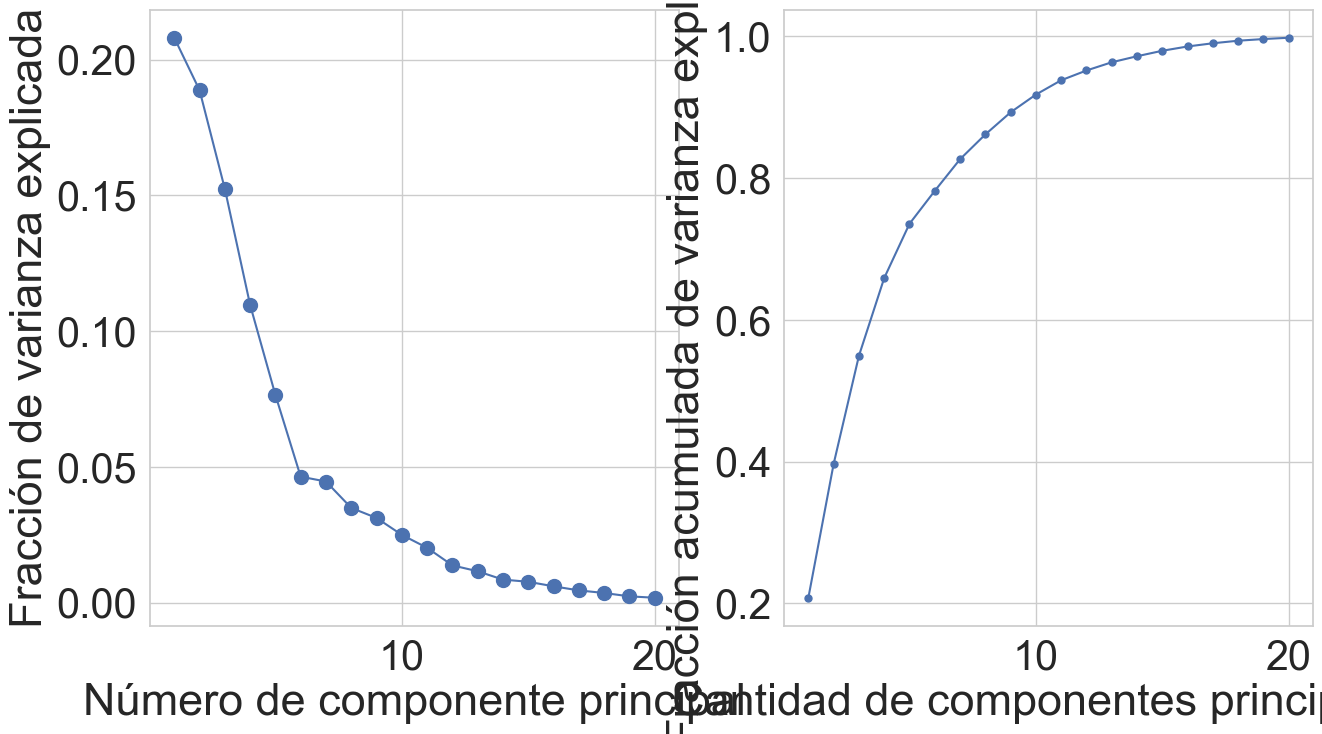

In [287]:

# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '.-', markersize = 10)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

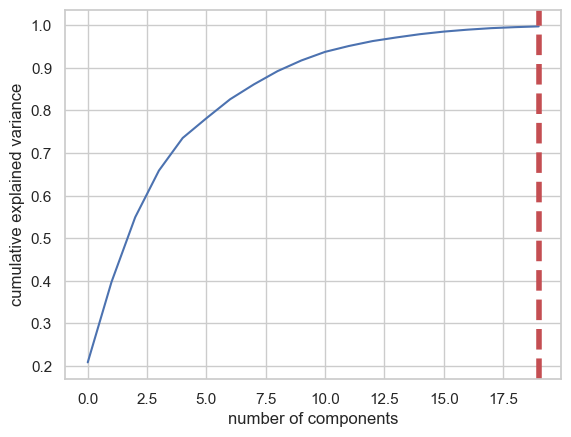

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.208031,0.208031
1,0.396757,0.188725
2,0.549160,0.152403
3,0.658821,0.109661
4,0.735328,0.076507
5,0.781751,0.046424
6,0.826376,0.044624
7,0.861290,0.034914
8,0.892503,0.031213
9,0.917489,0.024986


In [288]:
pca_test = PCA(n_components=componentes, svd_solver='full')
pca_test.fit(X_scaled)
X_train_scaled_pca = pca.transform(X_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=19, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(20))

In [289]:
# obtenemos los features en el espacio de componentes principales
features = list(df1.drop(['cod', 'label'], axis=1).columns)
# Agregamos la información de los componentes principales a un dataframe
dfcol = pd.DataFrame(pca.components_, columns=features)

In [290]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled_pca, y_train)

RandomForestClassifier()

In [291]:
print(classification_report(y_true=y_test,y_pred=rfc.predict(X_test_scaled_pca)))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



In [292]:
def balanced_accuracy(cm): # funcion para calcular la "balanced accuracy"
  sensibilidad = cm[1,1]/(cm[1,1]+cm[0,1])
  especificidad = cm[0,0]/(cm[1,0]+cm[0,0])
  return [sensibilidad, especificidad, (sensibilidad + especificidad)/2]

In [293]:
cm = confusion_matrix(y_test, rfc.predict(X_test_scaled_pca)) 
metricas = balanced_accuracy(cm)
print('Matriz de confusion del modelo es:')
print(cm)
print('Sensibilidad del modelo es de: {}'.format(round(metricas[0],4)))  
print('Especificidad del modelo es de: {}'.format(round(metricas[1],4)))  
print('BA del modelo es de: {}'.format(round(metricas[2],4))) 

Matriz de confusion del modelo es:
[[4 0]
 [2 0]]
Sensibilidad del modelo es de: nan
Especificidad del modelo es de: 0.6667
BA del modelo es de: nan


In [294]:
## Corremos el modelo con cross validation
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Mean AUC Score ===
Mean AUC Score - Random Forest:  nan


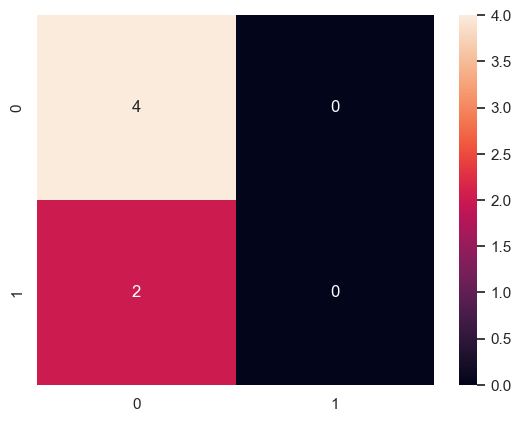

In [295]:
cf_matrix = confusion_matrix(y_test, rfc.predict(X_test_scaled_pca))
sns.heatmap(cf_matrix, annot=True);

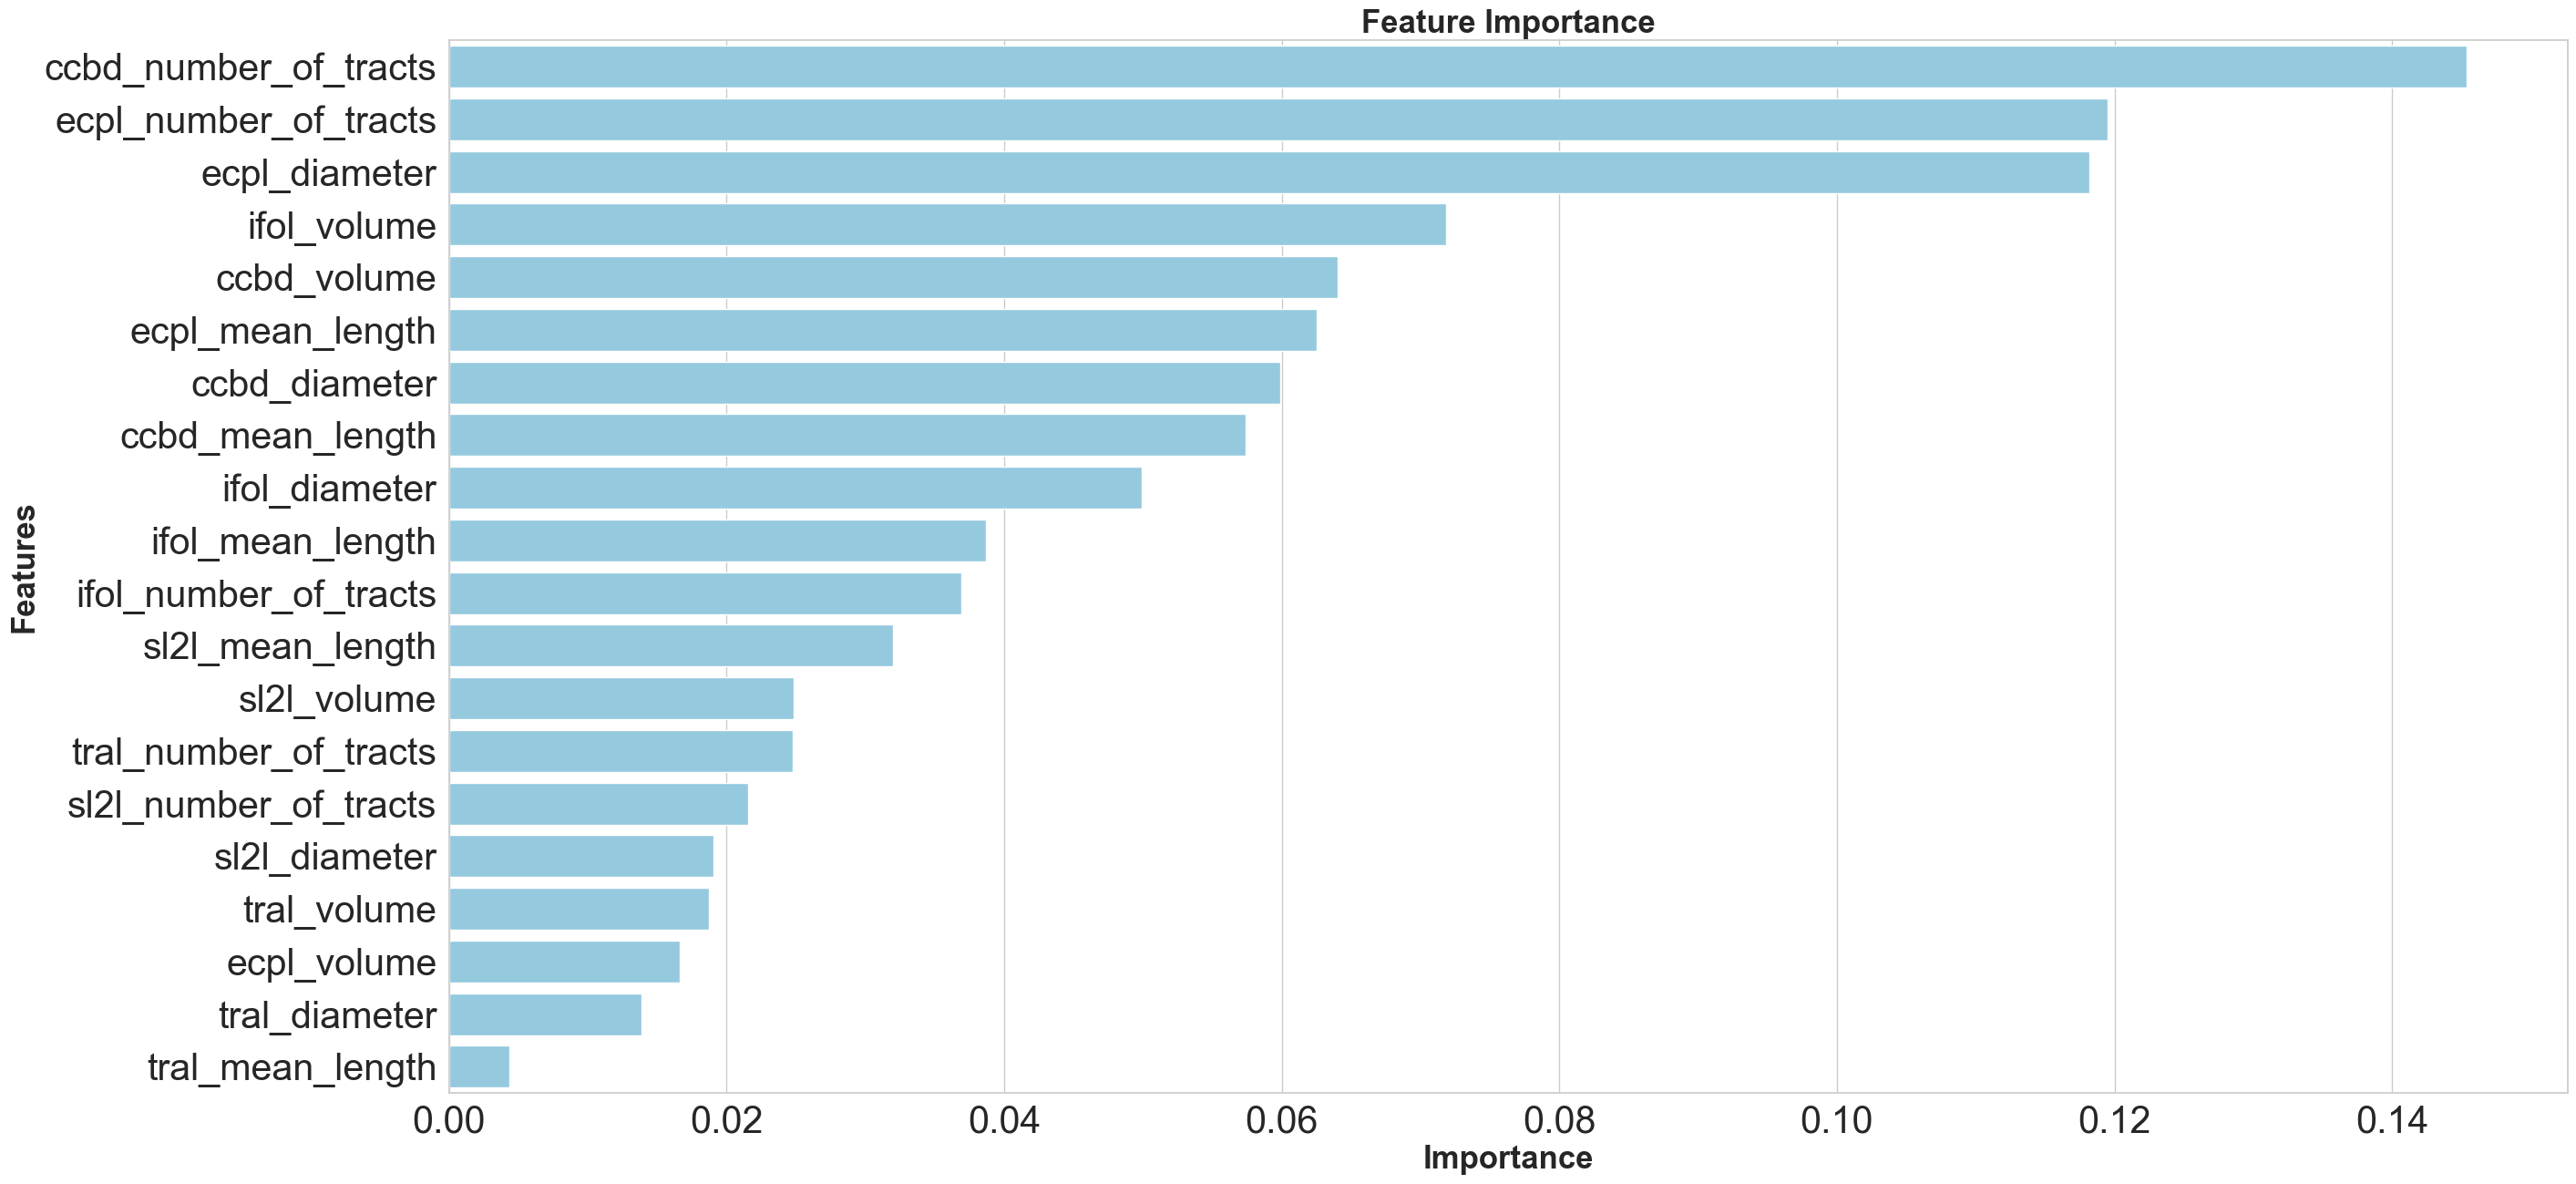

None

,Features,Gini-Importance
0,ccbd_number_of_tracts,0.145358
1,ecpl_number_of_tracts,0.119485
2,ecpl_diameter,0.118169
3,ifol_volume,0.071850
4,ccbd_volume,0.064005
5,ecpl_mean_length,0.062521
6,ccbd_diameter,0.059916
7,ccbd_mean_length,0.057421
8,ifol_diameter,0.049916
9,ifol_mean_length,0.038696


In [296]:
feats = {}
for feature, importance in zip(dfcol.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 2.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [297]:
df1.columns

Index(['cod', 'ccbd_diameter', 'ccbd_mean_length', 'ccbd_number_of_tracts',
       'ccbd_volume', 'ecpl_diameter', 'ecpl_mean_length',
       'ecpl_number_of_tracts', 'ecpl_volume', 'ifol_diameter',
       'ifol_mean_length', 'ifol_number_of_tracts', 'ifol_volume',
       'sl2l_diameter', 'sl2l_mean_length', 'sl2l_number_of_tracts',
       'sl2l_volume', 'tral_diameter', 'tral_mean_length',
       'tral_number_of_tracts', 'tral_volume', 'ufsl_diameter',
       'ufsl_mean_length', 'ufsl_number_of_tracts', 'ufsl_volume',
       'cfpr_diameter', 'cfpr_mean_length', 'cfpr_number_of_tracts',
       'cfpr_volume', 'fatr_diameter', 'fatr_iso', 'fatr_mean_length',
       'fatr_number_of_tracts', 'fatr_qa', 'fatr_radius_of_end_region_1',
       'fatr_radius_of_end_region_2', 'fatr_volume', 'ufsr_diameter',
       'ufsr_mean_length', 'ufsr_number_of_tracts', 'ufsr_volume', 'label',
       'cfpr_ip1_dif', 'cfpr_ip2_norm', 'ccbd_ip1_dif', 'ccbd_ip2_norm',
       'ecpl_ip1_dif', 'ecpl_ip2_norm', 'i